##**05. DBSCAN**


**DBSCAN의 개요**
1. DBSCAN을 구성하는 가장 중요한 파라미터: 입실론 주변 영역, 최소 데이터 개수
- 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함된 타 데이터의 개수

2. 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는지 여부에 따른 데이터 포인트의 정의
- 핵심 포인트: 주변 영역 내 최소 데이터 개수 이상의 타 데이터를 가지고 있는 경우
- 이웃 포인트: 주변 영역 내 위치한 타 데이터
- 경계 포인트: 주변 영역 내 최소 데이터 개수 이상의 이웃포인트를 가지진 않으나 핵심 포인트를 이웃 포인트로 가짐
- 잡음 포인트: 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않음

3. DBSCAN 군집화의 예시
- P1, ... P12까지의 12개의 데이터 세트에서 특정 입실론 반경 내에 포함될 최소 데이터 세트를 6개로 가정
- P1 데이터를 기준으로 입실론 반경 내 포함된 데이터 7개로 최소 데이터 5개 이상을 만족하기 때문에 P1데이터는 핵심 포인트가 됨
- P2 데이터 포인트의 경우 반경 내 6개의 데이터를 가지므로 마찬가지로 핵심 포인트가 됨
- 핵심 포인트인 P1의 이웃 데이터 포인트 P2역시 핵심포인트이면 P1에서 P2를 연결하여 직접적인 접근이 가능함
- 특정 핵심 포인트에서 직접접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성함 -> 이러한 방식으로 점차 군집화를 확장해가는것이 DBSCAN의 군집화 방식임
- P3 데이터의 경우 반경 내 포함되는 이웃 데이터는 2개이므로 군집으로 구분할 수 있는 데이터가 될 수 없으나 핵심 포인트인 P2를 가지고 있어 이는 경계 포인트가 됨
(경계 포인트는 군집의 외곽을 형성함)
- P5와 같은 반경 내에 최소 데이터를 가지고 있지 않고, 해심 포인트 또한 이웃 데이터로 가지고 있지 않으므로 이느 잡음 포인트가 됨

3. DBSCAN의 파라미터
- eps: 입실론 주변 영역 반경을 의미
- min_samples: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미(자기자신 포함)

**DBSCAN 적용하기 - 붓꽃 데이터 세트**


In [3]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['epal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns = feature_names)

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


In [5]:
# DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현하기 위해 앞에서 사용한 visualize_cluster_plot()을 사용
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()


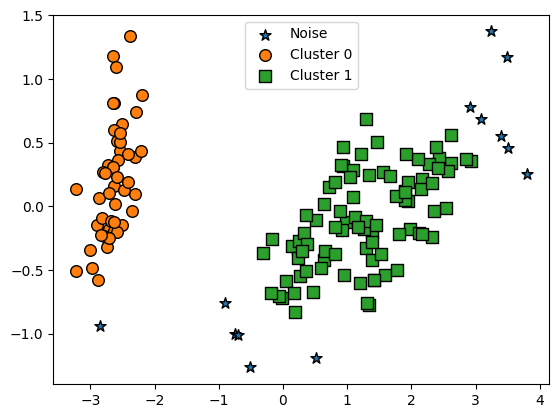

In [6]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_plot()함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환 값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

PCA를 활용하였더니 노이즈 데이터가 명확히 드러남

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


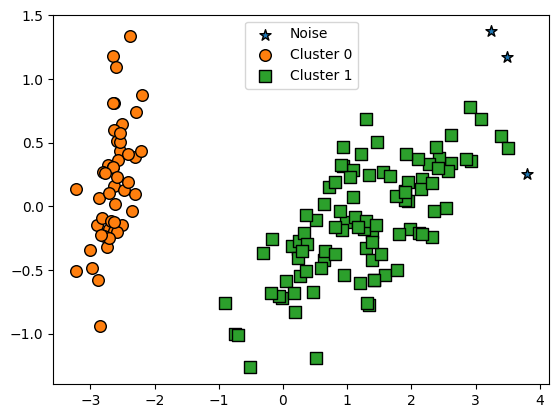

In [11]:
# eps를 0.6에서 0.8로 늘린 경우
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=None) # 책의 코드 오류

- eps를 0.6에서 0.8로 증가시키면 노이즈 군집인 -1이 3개밖에 없는 것을 확인가능, 즉 노이즈 데이터 수가 줄어든 것을 확인 가능
- eps=0.6에서 노이즈로 분류된 데이터 세트들이 0.8로 증가하면서 Cluster1에 소속된 것을 확인 가능

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64


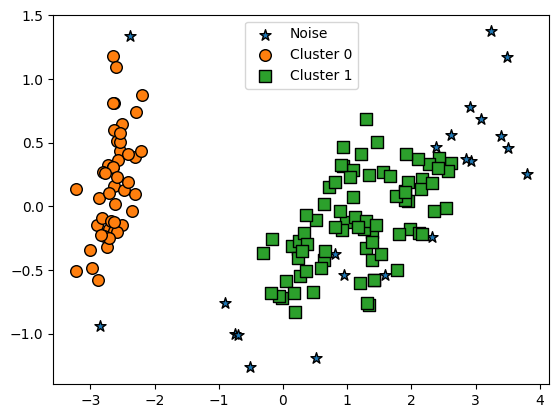

In [15]:
# eps는 기존 0.6으로 유지하고 min_samples를 16으로 늘린 경우
dbscan=DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=None)

노이즈 데이터가 기존보다 많이 증가한 것을 확인 가능

**DBSCAN 적용하기 - makes_circles() 데이터 세트**

- 기하학적 분포를 가지는 데이터 세트에서 DBSCAN과 타 알고리즘 비교하기
- makes_circles(): 내부 원과 외부 원 형태로 되어있는 2차원 데이터 세트
  - 2개의 피처만을 생성하기 때문에 별도의 피처개수 지정이 필요없음
  - noise파라미터: 노이즈 데이터 세트의 비율
  - factor: 외부 원과 내부 원의 scale 비율

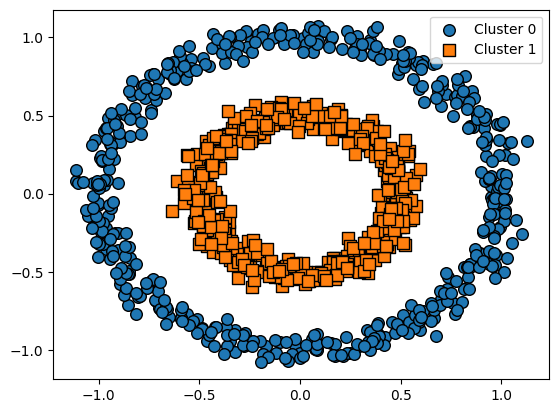

In [16]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

make_circles()가 내부 원과 외부 원으로 구성되는 데이터 세트를 생성하는 것을 확인 가능

<ipython-input-5-2444836685>:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\


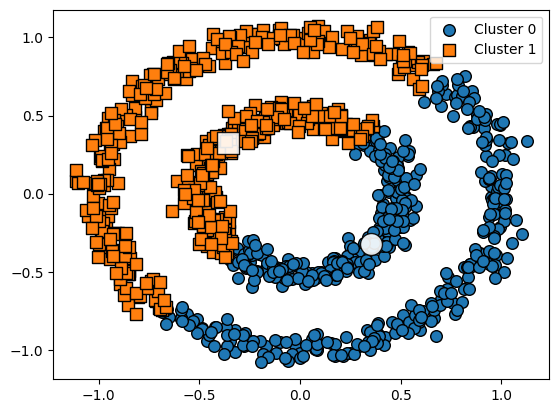

In [17]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

위, 아래 군집 중심을 기반으로 위와 아래 절반으로 군집화하는 것을 확인 가능

-> 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어려움

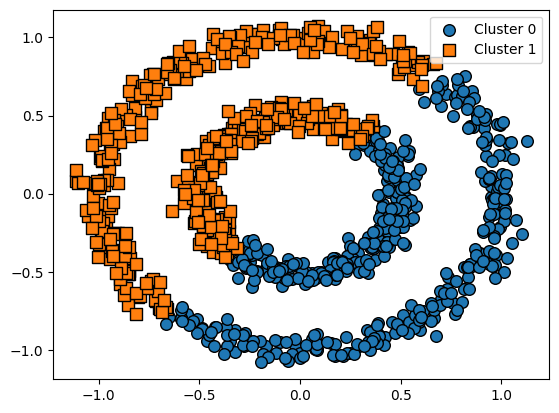

In [18]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

GMM도 KMeans와 마찬가지로 일렬로 늘어선 데이터에선 효과적으로 작용하나 내부와 외부의 원형으로 구성된 더 복잡한 데이터 세트에서는 군집화가 원하는 방향으로 이뤄지지 않음

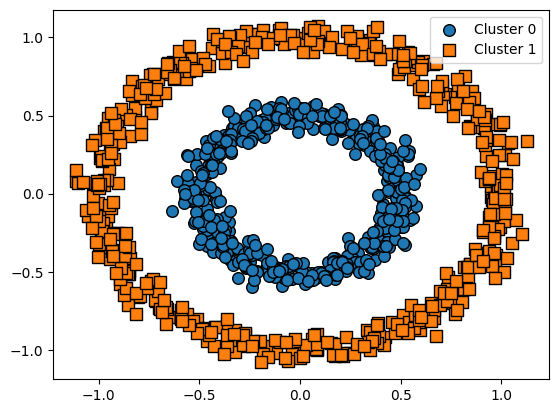

In [19]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행.
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

DBSCAN으로 군집화 결과, 원하는 방향으로 정확히 군집화를 수행함

##**06. 군집화 실습 - 고객 세그먼테이션**

**고객 세그먼테이션의 정의와 기법**
고객 세그먼테이션(customer Segmentation): 다양한 기준으로 고객을 분류하는 기법으로, CRM이나 마케팅의 중요 기바 요소
1. 고객을 분류하는 요소
- 얼마나 많은 매출을 발생하느냐가 고객의 기준을 정하는 중요 요소로 작용(기업 관점)
2. 고객 세그먼테이션의 주요 목표: 타깃 마케팅
- 고객을 여러 특성에 맞게 세분화하여 그 유형에 따라 맞춤형 마케팅이나 서비스를 제공하는 것
3. 군집화: RFM 기법
- RECENCY(R): 가장 최근 상품 구입 일에서 오늘까지의 기간
- FREQUENCY(F): 상품 구매 횟수
- MONETARY VALUE(M): 총 구매 금액


**데이터 세트 로딩과 데이터 클렌징**

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io="/content/drive/MyDrive/Colab Notebooks/Online Retail.xlsx")
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


데이터: 제품 주문 dataset
- Invoics(주문번호)+ StockCode(제품 코드)를 기반으로 주문량, 주문일자, 제품 단가, 주문 고객번호, 주문 고객 국가 등으로 구성됨


In [22]:
# 데이터 세트의 전체 건수, 칼럼 타입, Null 개수 확인
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Null 데이터가 상당히 많은 것을 알 수 있고, 다른 칼럼의 경우에도 오류 데이터가 존재하는 것을 알 수 있음 -> 전처리 필요
- Null 데이터 제거: 특히 CustomerID가 Null인 데이터가 많은데 고객 세그먼테이션을 수행할 때 고객 식별번호가 없는 데이터는 필요가 없기 때문에 제거함
- 오류 데이터 삭제: 오류 데이터(대표적으로 Quantity, UniPrice < 0인 경우)는 분석의 효율성을 위해 모두 제거함


In [23]:
#불린 인덱싱을 적용하여 Quantity>0, UniPrice>0 & CustomerID != Null인 데이터만 필터링 수행
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [24]:
# Country 칼럼은 주문 고객 국가를 나타냄
retail_df['Country'].value_counts()[:5]

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484


In [25]:
# 영국이 대다수를 차지하기 때문에 다른 국가의 데이터는 모두 삭제함
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


최종 데이터가 축소함

**RFM 기반 데이터 가공**


In [26]:
# 사전 정제된 데이터를 기반으로 고객 세그먼테이션 군집화를 RFM을 기반으로 수행
# 이를 위해 필요데이터를 추가적으로 가공함
# UnitPrice와 Quantity를 곱해 주문 금액 데이터를 생성
# CustomerID를 편리한 식별성을 위해 int형으로 변환
retail_df['sale_amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [27]:
# 해당 데이터 세트의 경우 주문 횟수와 주문 금액이 압도적으로 특정 고객에게 많은 특성을 가짐
# 이를 확인하기 위해 Top-5 주문 건수와 주문 금액을 가진 고객 데이터를 추출
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [29]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

np.float64(1.028702077315023)

- 해당 값이 거의 1에 가깝게 유일한 식별자 레벨이 됨을 확인 가능
- RFM 기반 고객 세그먼테이션은 고객 레벨로 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 해 세그먼테이션을 수행하기 때문에 해당 데이터를 RFM 데이터로 변경

In [30]:
# DataFrame의 groupby를 multiple연산을 위해 agg()사용
# Recency는 InvoicDate칼럼을 max()에서 데이터 가공
# Frequency는 InvoiceNO 칼럼의 count(), Monetary value는 sale_amount 칼럼의 sum()
aggregations={
    'InvoiceDate':'max',
    'InvoiceNo':'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns={
    'InvoiceDate':'Recency',
    'InvoiceNo':'Frequency',
    'sale_amount':'Monetary'
})
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


- Recency 칼럼의 경우 개별 고객 당 가장 최근의 주문이므로 데이터 값의 특성 때문에 추가적인 데이터 가공이 필요함
- 해당 칼럼은 최근 주문한 날짜를 기반으로 하나, 오늘 날짜임에도 불구하고 이를 현재 날짜로 해석하면 안됨

  -> 2011년 12월 10일을 현재 날짜로 간주하고 가장 최근 주문일자를 뺀 데이터에서 일자 데이터만 추출 진행

In [31]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 칼럼 건수는', cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


고객 별로 RFM 분석에 필요한 칼럼을 모두 생성함

**RFM 기반 고객 세그먼테이션**

생성된 고객 RFM 데이터 세트의 특성을 개괄적으로 알아보고 RFM 기반에서 고객 세그먼테이션을 수행하기


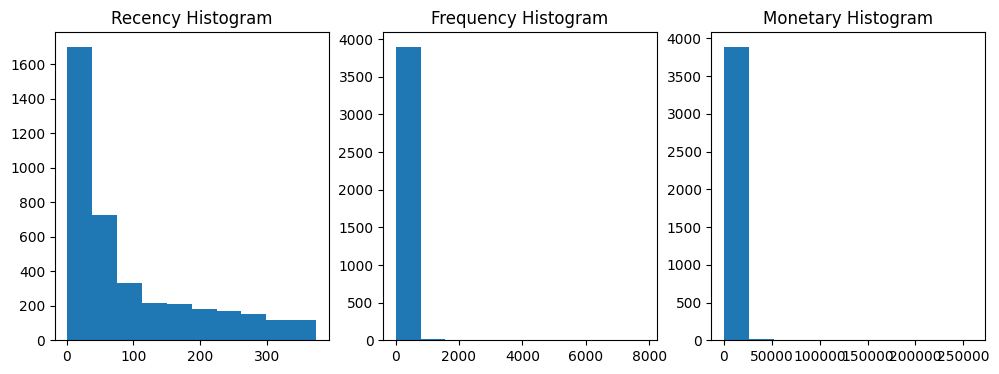

In [32]:
# 해당 데이터는 주문 횟수와 주문금액에서 개인 고객 주문과 소매업체의 대규모 주문간 큰 차이가 나타남
# 즉 이는 왜곡된 데이터 분포도를 가지게 되므로 칼럼별 히스토그램을 확인하여 어떤 현상이 발생하는지 확인
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])
plt.show()

- 세개의 칼럼 모두 왜곡된 데이터 값을 가지고 있으며, Frequency, Monetary의 경우 특정 범위에 값이 몰려있어 왜곡정도가 매우 큼을 확인 가능

In [33]:
# 각 칼럼의 데이터값 백분위를 확인하여 값의 분포를 확인
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


- 왜곡 정도가 매우 높은 데이터 세트에 K평균 군집을 적용하면 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행됨
- 이를 확인하기 위해 K평균 군집화를 수행

In [34]:
# KMeans cluster 수행
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features)
cust_df['cluster_label'] = labels

print('실루엣 스코어는: {0:.3f}'.format(silhouette_score(X_features, labels)))

실루엣 스코어는: 0.576


- 군집을 3개로 구성하는 경우 실루엣 스코어가 안정적인 스코어가 나타남
- 이를 각 군집별 실루엣 계수 값을 확인하도록 군집화 구성을 시각화하자

In [35]:
# 부록 소스코드
def visualize_silhouette(cluster_lists, X_features):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm

    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        labels = clusterer.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, labels)
        sil_vals = silhouette_samples(X_features, labels)

        y_lower = 10
        axs[ind].set_title(f'Number of Clusters: {n_cluster}\nSilhouette Score: {sil_avg:.3f}')
        axs[ind].set_xlabel("Silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_sil_vals = sil_vals[labels == i]
            ith_sil_vals.sort()
            size_i = ith_sil_vals.shape[0]
            y_upper = y_lower + size_i
            color = cm.nipy_spectral(i / n_cluster)
            axs[ind].fill_betweenx(
                range(y_lower, y_upper),
                0, ith_sil_vals,
                facecolor=color, edgecolor=color, alpha=0.7
            )
            axs[ind].text(-0.05, y_lower + 0.5 * size_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

    plt.show()

In [36]:
# 부록 소스코드
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    import numpy as np

    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        kmeans = KMeans(n_clusters=n_cluster, random_state=0)
        labels = kmeans.fit_predict(X_features)

        # 2차원 표현을 위한 PCA
        pca = PCA(n_components=2)
        transformed = pca.fit_transform(X_features)

        axs[ind].scatter(transformed[:, 0], transformed[:, 1],
                         c=labels, cmap='viridis', s=10)
        axs[ind].set_title(f'KMeans with K={n_cluster}')
        axs[ind].set_xlabel('PCA Component 1')
        axs[ind].set_ylabel('PCA Component 2')

    plt.tight_layout()
    plt.show()

In [38]:
scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features)

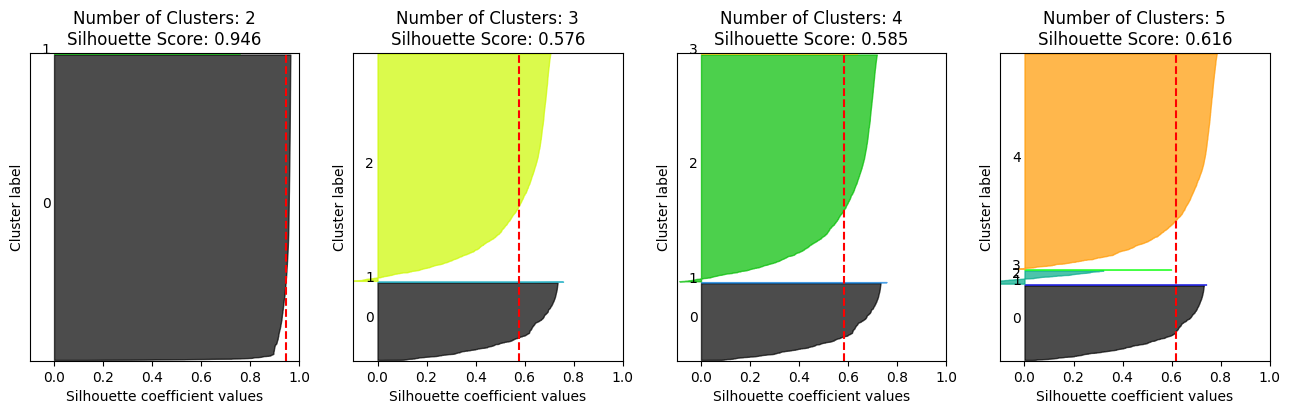

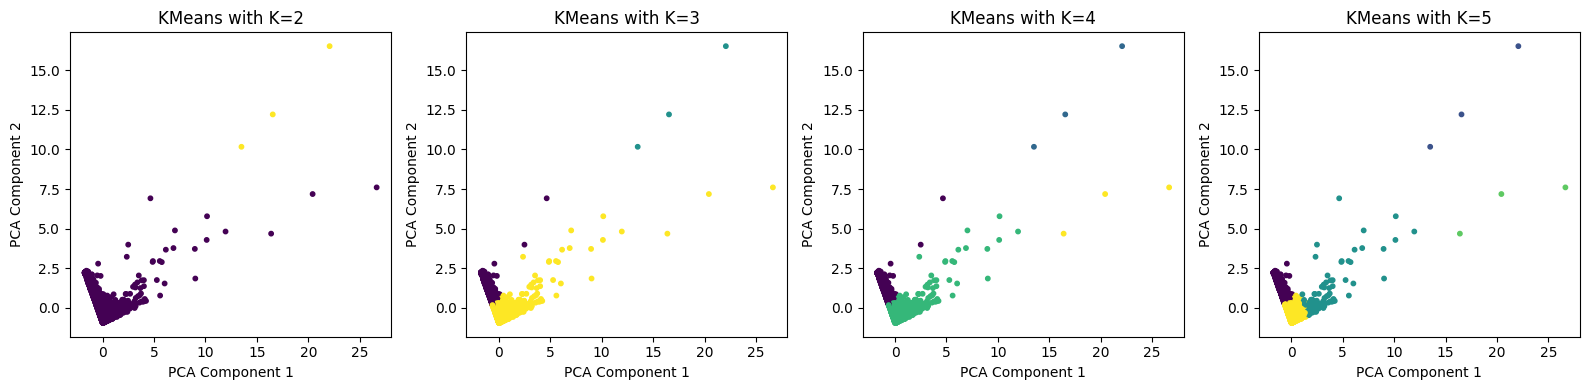

In [40]:
visualize_silhouette([2,3,4,5], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5], X_features_scaled)

- 군집이 2개인 경우 0과 1이 너무 개괄적으로 군집화 된 것을 확인 가능
- 군집이 3개 이상에서 개선될 것으로 추측했으나. 데이터 세트의 개수가 너무 작은 군집이 만들어져 오히려 실루엣 계수도 매우 작아짐

In [42]:
# 데이터 세트의 왜곡 정도를 낮추기 위해 데이터 값에 로그를 적용한 로그변환을 수행한 뒤 이를 K-평균 알고리즘을 적용하여 비교
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequency, Monetary 칼럼에 np.log1p()로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
X_features = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features)
cust_df['cluster_label'] = labels

print('실루엣 스코어는: {0:.3f}'.format(silhouette_score(X_features, labels)))

실루엣 스코어는: 0.303


- 실루엣 스코어는 로그변환 전보다 떨어지는 것을 확인가능
- 하지만 시각화를 수행하면 앞의 경우보다 더 균일하게 군집화가 된 것을 확인 가능

 -> 즉 왜곡된 데이터 세트에 로그변환을 수행한 뒤 군집화를 수행하면 더 나은 결과 도출 가능